# Week 6: Spectral Graph Theory

Today we will work with graphs. Therefor, we need a python library for representing graphs. 
In particular, we will need `networkx`.
Please run the following commands in your anaconda environment:

```bash
> pip install networkx
```

Afterwards, you should be able to restart your kernel and successfully run the following imports.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import networkx as nx

%matplotlib inline

## Exercise 1: Graphs and Their Spectrums

In this exercise, we will look at the spectrum of a complete graph, a cycle graph (2-regular), and a random 3-regular graph, respectively.
Read and run the code below and consider the eigenvalues plotted.

1. Describe the differences in the eigenvalues for the three graphs
2. Run the code a couple of times and observe what happens to the largest eigenvalue of the random 3-regular graph.

Sum of lambdas
  G1  |  G2   |  G3  
10.000 | 10.000 | 10.000 



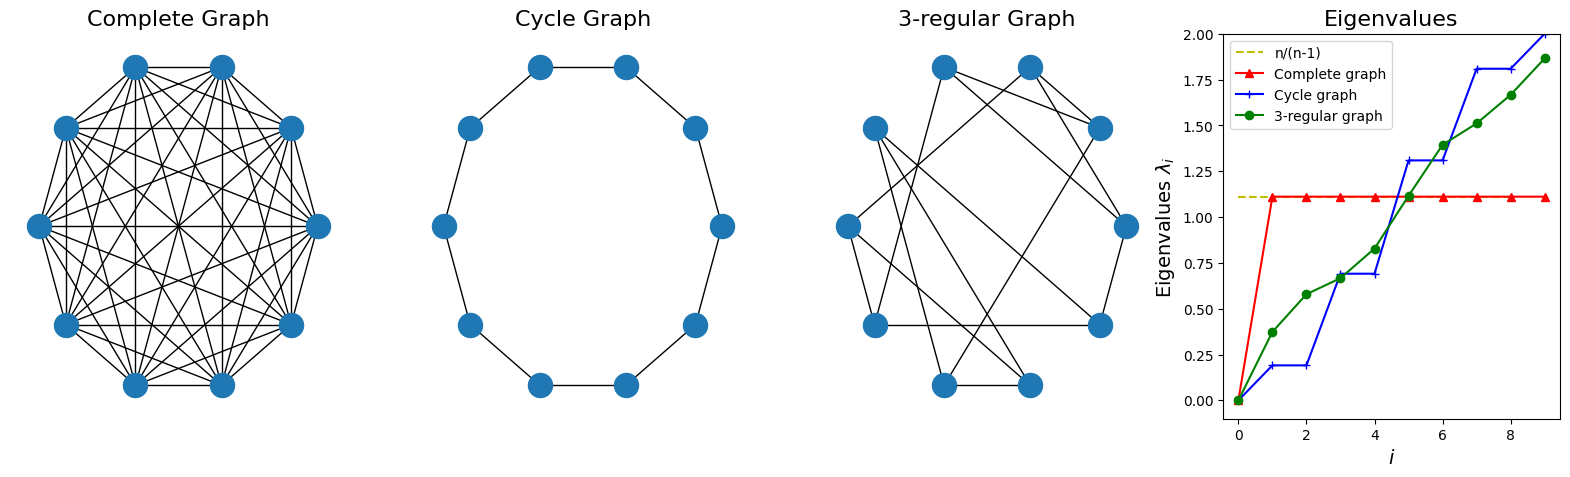

In [3]:
def graph_eig(G): 
    """
        Takes a graph and returns the eigenvalues and eigenvectors of its normalized Laplacian matrix (L = D^{-1/2}(D-A)D^{-1/2})
    """
    A  = nx.to_numpy_array(G)
    D  = A.sum(axis=1)
    D_ = 1. / np.sqrt(D)
    D_ = np.diag(D_)
    L  = D_ @ (np.diag(D)-A) @ D_
    
    lambdas, eigenvectors = np.linalg.eig(L)
    lambdas = np.real(lambdas)
    eigenvectors = np.real(eigenvectors)
    
    order = np.argsort(lambdas)
    lambdas = lambdas[order]
    eigenvectors = eigenvectors[:, order]
    
    return lambdas, eigenvectors

G1 = nx.complete_graph(10)             # Complete graph
G2 = nx.cycle_graph(10)                # Cycle graph
G3 = nx.random_regular_graph(3, 10)    # Random 3-regular graph

l1, e1 = graph_eig(G1)
l2, e2 = graph_eig(G2)
l3, e3 = graph_eig(G3)

fig, ax = plt.subplots(1,4, figsize=(20, 5))

ax[0].set_title("Complete Graph", fontsize=16)
nx.draw_circular(G1, ax=ax[0])
ax[1].set_title("Cycle Graph", fontsize=16)
nx.draw_shell(G2, ax=ax[1])
ax[2].set_title("3-regular Graph", fontsize=16)
nx.draw_shell(G3, ax=ax[2])

ax[3].set_title("Eigenvalues", fontsize=16)
ax[3].set_xlabel('$i$', fontsize=14)
ax[3].set_ylabel('Eigenvalues $\lambda_i$', fontsize=14)
ax[3].plot([0, 8], [10/9., 10/9.], 'y--', label="n/(n-1)")
ax[3].plot(l1,'r^-', label='Complete graph')
ax[3].plot(l2,'b+-', label='Cycle graph')
ax[3].plot(l3,'go-', label='3-regular graph')
ax[3].set_ylim([-0.1,2.0])
ax[3].legend()

print("Sum of lambdas")
print("  G1  |  G2   |  G3  ")
print("%.3f | %.3f | %.3f " % (l1.sum(), l2.sum(), l3.sum()))
print()

## Exercise 2: Spectral Properties of the normalized Graph Laplacian
If we take a closer look at the spectrum above, we observe the following proverties:

1. $\lambda_0 = 0$ for all graphs
1. For all the graphs $\sum_{i=0}^{n-1} \lambda_i = n$
1. For all the graphs, $\lambda_1 \leq \frac{n}{n-1}$
1. For all the graphs, $\lambda_{n-1} \geq \frac{n}{n-1}$
1. For the complete graph, $\lambda_1, \dots, \lambda_{n-1} = \frac{n}{n-1}$

In the following, let $A$ be the adjacency matrix and $[D]_{i,i} = \sum_{j}A_{i, j}$ is the degree matrix.
We refer to eigenvalues $\lambda_i$s of the normalized laplacian $\mathcal{L} = D^{-1/2}LD^{-1/2} = I - D^{-1/2}AD^{-1/2}$.

We will now prove the five observations:

**2.1) $\lambda_0$ is always $0$**  
Prove that the smallest eigenvalue $\lambda_0 = 0$ for any graph.

For the graph Laplacian $L = D - A$, we know that the vector of all ones ($\boldsymbol{1}$) is an eigenvector with eigenvalue 0.

Considering the normalized laplacian ($\mathcal{L}$), we see that if we choose $x = D^{1/2}\boldsymbol{1}$, then

$$
 \begin{align}
     \mathcal{L}x &= (D^{-1/2}LD^{-1/2})x \\
     &= D^{-1/2}L \boldsymbol{1}\\
     &= D^{-1/2} \boldsymbol{0}\\
     &= \boldsymbol{0}
 \end{align}
$$

So $x = D^{1/2}\boldsymbol{1}$ is an eigenvector with eigenvalue $0$.
Since $\mathcal{L}$ is PSD, i.e., all eigenvalues are non-negative, $0$ must be the smallest eigenvalue.

**2.2) Sum of the spectrum**  
Prove that if a graph $G$ with $n$ nodes is connected, i.e., there are no isolated nodes, then 
$$
\sum_{i=0}^{n-1} \lambda_i = n
$$

_Hint:_ Recall [the relationship](https://en.wikipedia.org/wiki/Trace_%28linear_algebra%29#Eigenvalue_relationships) between eigenvalues and the trace. 

Since $\mathcal{L}$ has ones on the diagonal, $ \sum_{i=0}^{n-1} \lambda_i = tr\left[\mathcal{L}\right] =n$

**2.3) Upper bound on $\lambda_1$**  
Prove that if a graph $G$ is connected, then 
$$
\lambda_1 \leq \frac{n}{n-1}
$$

From above we know that $\lambda_0 = 0$ and thus that $\sum_{i=1}^{n-1} \lambda_i = n$. 

If we are to keep the constraint that $\lambda_1 \leq \lambda_2 \dots \leq \lambda_{n-1}$, then $\lambda_1$ can be no more than the average value of the lambdas: 
$$
\frac{1}{n-1} \sum_{i = 1}^{n-1} \lambda_i = \frac{n}{n-1}
$$

**2.4) Lower bound on $\lambda_{n-1}$**  
Prove that if a graph $G$ is connected, then 
$$
\lambda_{n-1} \geq \frac{n}{n-1}
$$

Same argument as above but from the other end.

**2.5) Tight bound for complete graphs**  
To prove that for all complete graphs, $\lambda_0 = 0$ and $\lambda_i = \frac{n}{n-1}$ for $i=1, \dots, n-1$.

Recall from 2.1 that $f = D^{1/2}\boldsymbol{1}$ is the first eigenvector of $\mathcal{L}$.
Now consider another vector $x$, which is orthogonal to $f$, i.e., $ x^T f = 0$ or 
$$
\sum_{i=1}^n x_i f_i = \sum_{i=1}^n x_i \sqrt{d_i} = 0.
$$

Since we are considering a complete graph where the degree ($d_i$) of each node is the same ($d_i = n-1$ for all $i$), we have that

$$
    0 = \sum_{i=1}^n x_i \sqrt{d_i} = \sqrt{n-1} \sum_{i=1}^n x_i \Rightarrow \sum_{i=1}^n = 0
$$

For any such vector $x$, we have the following relationship to the normalized laplacian:

$$
\begin{align}
    \left[ \mathcal{L}x \right]_i &= x_i + \sum_{j \neq i}^n\frac{-1}{\sqrt{d_i}\sqrt{d_j}} x_j\\
    &= x_i - \sum_{j\neq i}^n \frac{1}{d} x_j\\
    &= x_i - \sum_{j\neq i}^n \frac{1}{n-1} x_j\\
    &= \frac{(n-1) x_i - \sum_{j\neq i}^n x_j}{n-1}\\
    &= \frac{nx_i - \sum_{j=0}^n x_j}{n-1}\\
    &= \frac{n}{n-1} x_i
\end{align}
$$ 

So any vector orthogonal to $f$ is an eigenvector and has eigenvalue $\frac{n}{n-1}$, when $K$ is complete.
Same proof can be used to show similar properties of $k$-regular graphs by the way.

## Exercise 3: Karate World

In this exercise, we will look at Zachary's Karate club.
Run the code below to visualize it.

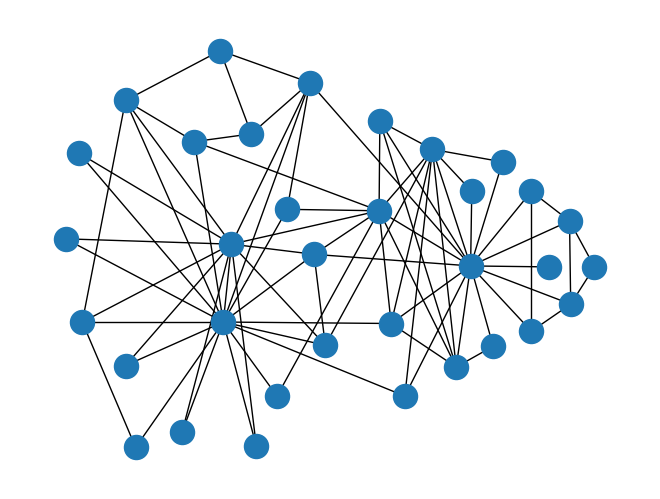

In [4]:
karate = nx.Graph()
karate.add_edges_from([(1,2), (1,3), (1,4), (1,5), (1,6), (1,7), (1,8), (1,9), (1,11), (1,12), (1,13), (1,14), (1,18), (1,20), (1,22), (1,32), (2,3), (2,4), (2,8), (2,14), (2,18), (2,20), (2,22), (2,31), (3,4), (3,8), (3,9), (3,10), (3,14), (3,28), (3,29), (3,33), (4,8), (4,13), (4,14), (5,7), (5,11), (6,11), (6,17), (6,7), (7,17), (9,31), (9,33), (9,34), (10,34), (14,34), (15,33), (15,34), (16,33), (16,34), (19,33), (19,34), (20,34), (21,33), (21,34), (23,33), (23,34), (24,26), (24,28), (24,30), (24,33), (24,34), (25,26), (25,28), (25,32), (26,32), (27,30), (27,34), (28,34), (29,32), (29,34), (30,33), (30,34), (31,33), (31,34), (32,33), (32,34), (33,34)])
fixed_positions = {1:(10.74,4.07),2:(9.76,6.48),3:(8.39,5.21),4:(10.37,1.98),5:(12.30,5.61),6:(13.31,3.28),7:(13.28,5.00),8:(8.41,7.06),9:(6.72,4.31),10:(5.77,1.38),11:(12.30,2.72),12:(12.75,4.05),13:(11.32,2.41),14:(8.70,2.88),15:(3.33,0.63),16:(1.88,2.01),17:(13.92,4.05),18:(10.77,5.61),19:(0.69,6.40),20:(9.05,1.38),21:(0.34,4.63),22:(11.56,6.22),23:(5.24,0.34),24:(1.88,7.49),25:(5.11,6.80),26:(4.31,8.52),27:(2.14,0.32),28:(3.65,6.64),29:(6.03,5.24),30:(0.77,2.91),31:(7.01,2.43),32:(6.61,7.86),33:(4.60,4.52),34:(4.39,2.91)}
nx.draw(karate,pos=fixed_positions)
plt.show()

Text(0.5, 1.0, 'Karate spectrum')

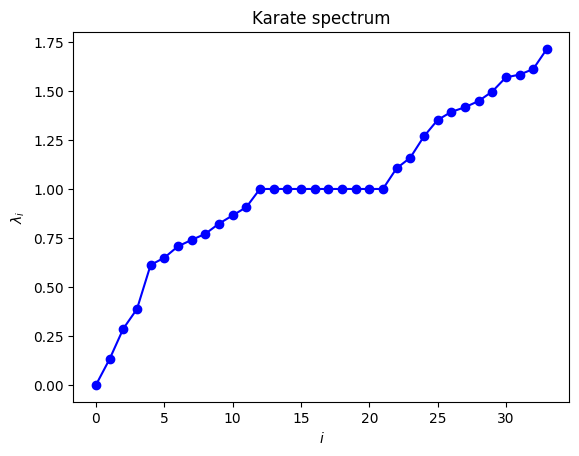

In [5]:
lk, ek = graph_eig(karate)
fig, ax = plt.subplots(1,1)
ax.plot(lk, 'b-o')
ax.set_xlabel("$i$")
ax.set_ylabel("$\lambda_i$")
ax.set_title("Karate spectrum")

The plot of the spectrum looks as expected. Let's 
look at the properties of the eigenvectors of the graph.

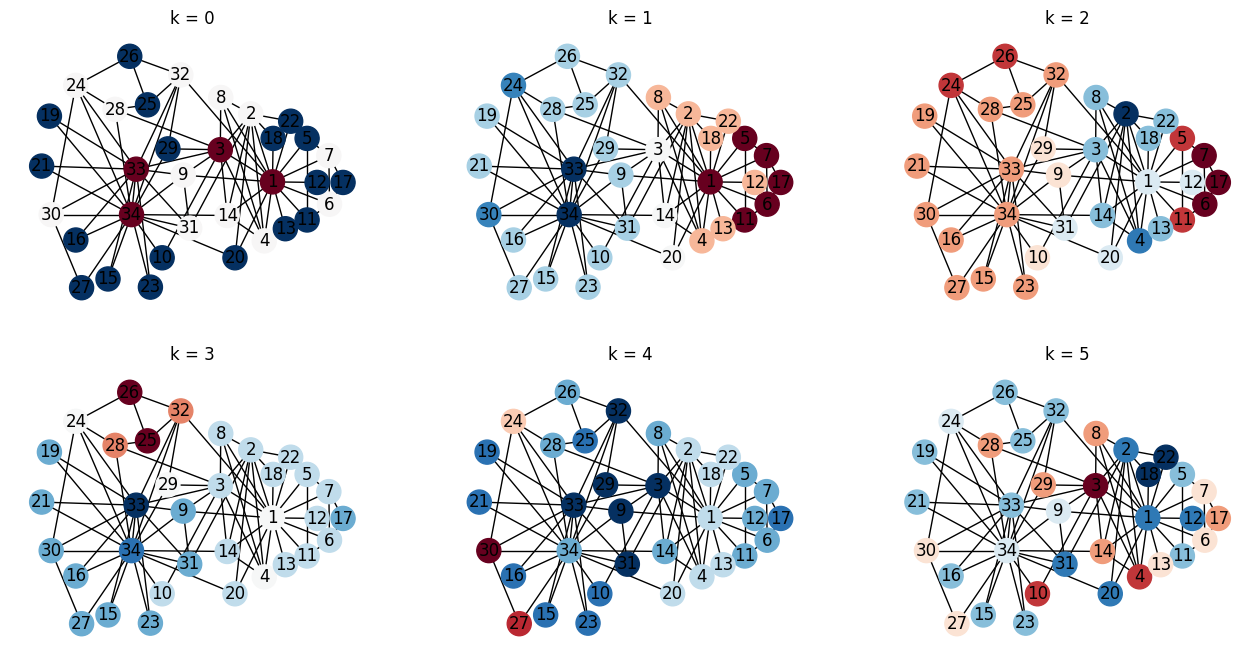

In [6]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8))
ek_ = np.around(ek, decimals=1)
for k in np.arange(0,6): 
    i, j = k // 3, k % 3
    ncs = ek_[:,k]
    nx.draw(karate, ax=ax[i, j], cmap=plt.get_cmap('RdBu'), node_color=ncs, pos=fixed_positions, with_labels=True)
    ax[i, j].set_title("k = %i" % k)

**Exercise 3.1**  
 - What happens to the node coloring as $k$ increases? 
 - Do you observe anything surprising?
 - How does what we see here relate to Spectral Clustering?

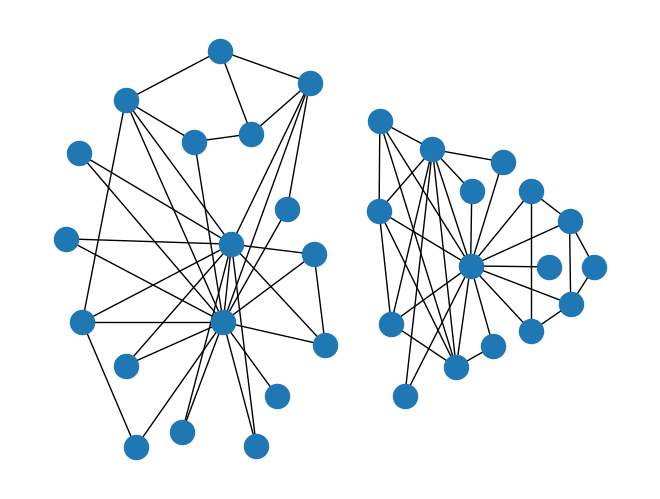

In [7]:
karate2 = nx.Graph()
karate2.add_edges_from([(1,2), (1,3), (1,4), (1,5), (1,6), (1,7), (1,8), (1,11), (1,12), (1,13), (1,14), (1,18), (1,20), (1,22), (2,3), (2,4), (2,8), (2,14), (2,18), (2,20), (2,22), (3,4), (3,8), (3,14), (4,8), (4,13), (4,14), (5,7), (5,11), (6,11), (6,17), (6,7), (7,17), (9,31), (9,33), (9,34), (10,34), (15,33), (15,34), (16,33), (16,34), (19,33), (19,34), (21,33), (21,34), (23,33), (23,34), (24,26), (24,28), (24,30), (24,33), (24,34), (25,26), (25,28), (25,32), (26,32), (27,30), (27,34), (28,34), (29,32), (29,34), (30,33), (30,34), (31,33), (31,34), (32,33), (32,34), (33,34)])
fixed_positions = {1:(10.74,4.07),2:(9.76,6.48),3:(8.39,5.21),4:(10.37,1.98),5:(12.30,5.61),6:(13.31,3.28),7:(13.28,5.00),8:(8.41,7.06),9:(6.72,4.31),10:(5.77,1.38),11:(12.30,2.72),12:(12.75,4.05),13:(11.32,2.41),14:(8.70,2.88),15:(3.33,0.63),16:(1.88,2.01),17:(13.92,4.05),18:(10.77,5.61),19:(0.69,6.40),20:(9.05,1.38),21:(0.34,4.63),22:(11.56,6.22),23:(5.24,0.34),24:(1.88,7.49),25:(5.11,6.80),26:(4.31,8.52),27:(2.14,0.32),28:(3.65,6.64),29:(6.03,5.24),30:(0.77,2.91),31:(7.01,2.43),32:(6.61,7.86),33:(4.60,4.52),34:(4.39,2.91)}
nx.draw(karate2,pos=fixed_positions)
plt.show()

**Exercise 3.2:**  
In the above graph, we have cut some edges to form two connected components.
What will happen to the spectrum of this simpler graph?

If you want, you can try to plot the spectrum and see if you were right.

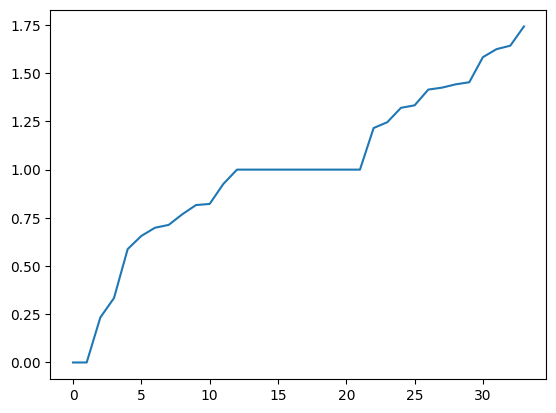

In [8]:
l, e = graph_eig(karate2)
plt.plot(l)

## Exercise 4: Other spectrums

Please find the spectrums of different symmetric matrices, computed from the karate graph, below. 
Write code to plot them and explain how the spectrums differ.

In particular, what can you say about the sum of the spectrums and the bounds on the eigenvalues?

c:\Users\Joachim Brendborg\Documents\Universitet\8. Semester\Data Mining\dm2023-exercises\.venv\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-8.881784197001252e-16+0j) 156.0 34.0 (-7.7692307692307825-6.162975822039155e-33j)


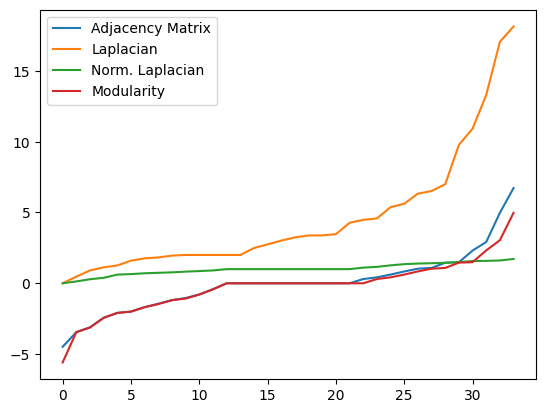

In [9]:
# Returns eigenvalues of the adjacency matrix of G.
lA = nx.adjacency_spectrum(karate)
lA = np.sort(lA)

# Returns eigenvalues of the Laplacian of G
lL = nx.laplacian_spectrum(karate)
lL = np.sort(lL)

# Return eigenvalues of the normalized Laplacian of G
lN = nx.normalized_laplacian_spectrum(karate)
lN = np.sort(lN)

# Returns eigenvalues of the modularity matrix of G.
lM = nx.modularity_spectrum(karate)
lM = np.sort(lM)

# TODO plot the spectrums
fig, ax = plt.subplots(1,1)
ax.plot(lA, label="Adjacency Matrix")
ax.plot(lL, label="Laplacian")
ax.plot(lN, label="Norm. Laplacian")
ax.plot(lM, label="Modularity")
ax.legend()

print(lA.sum(), lL.sum(), lN.sum(), lM.sum())

## Exercise 5: Spectral Clustering
In this exercise, we are going to implement the spectral clustering algorithm. 
Recal, that the algorithm has three steps:

1. Construct nearest-neighbor-graph of the data.
2. Do the eigen-decomposition of the graph Laplacian
3. Use K-means to cluster the features of the eigenvectors corresponding to the smallest non-zero eigenvalues

Below, we will make code that allows us to test performance of different Laplacians.
But first we need some data to cluster.

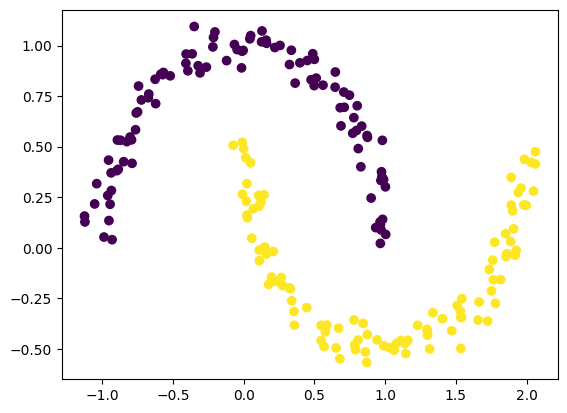

In [10]:
import sklearn.datasets
X, y = sklearn.datasets.make_moons(n_samples=200, shuffle=True, noise=.06)
fig, ax = plt.subplots(1, 1)
ax.scatter(*(X.T), c=y)
plt.show()

Note how K-Means it self does not work on this data-set, as opposed to Spectral Clustering.

c:\Users\Joachim Brendborg\Documents\Universitet\8. Semester\Data Mining\dm2023-exercises\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


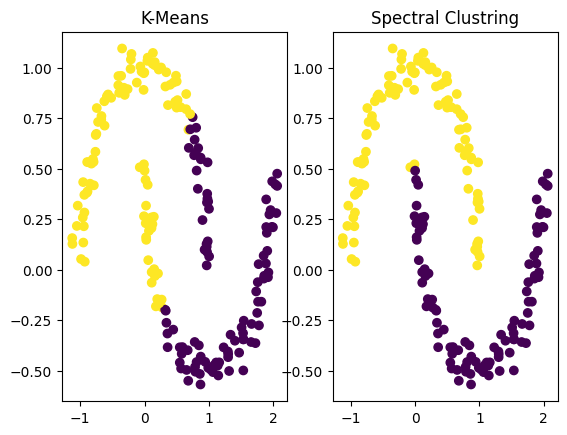

In [11]:
from sklearn.cluster import SpectralClustering, KMeans

clustering = SpectralClustering(n_clusters=2, n_neighbors=20, affinity='nearest_neighbors').fit(X)
kmeans = KMeans(2).fit(X)

fig, ax = plt.subplots(1, 2)
ax[0].set_title("K-Means")
ax[0].scatter(*(X.T), c=kmeans.labels_)
ax[1].set_title("Spectral Clustring")
ax[1].scatter(*(X.T), c=clustering.labels_)


Let's try to implement Spectral Clustering.
You may use the [NearestNeighbors](https://scikit-learn.org/stable/modules/neighbors.html) algorithm from sklearn to speed up things a bit.

You can try with different Laplacians if you want.

Hints to make it work:
 - Use weighted adjacency matrix (mode='distance' for `kneighbors_graph`)
 - n_neighbors=2 and 3 eigenvectors worked well for us.

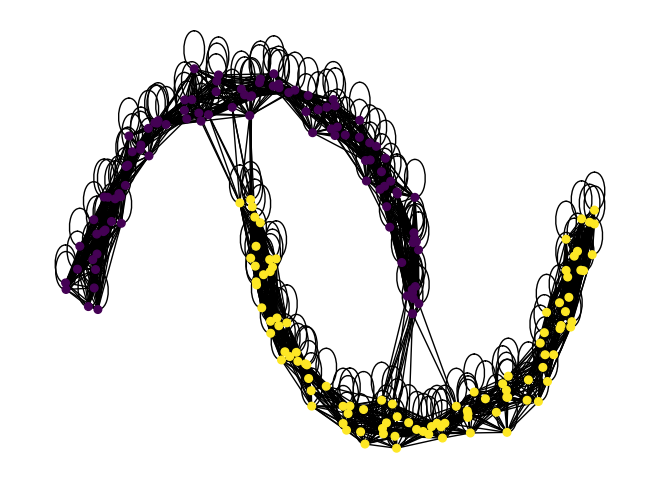

In [14]:
from sklearn.neighbors import NearestNeighbors

# Comstruct nearest neighbor graph.
nbrs = NearestNeighbors(n_neighbors=20).fit(X)
moons = nx.from_scipy_sparse_array(nbrs.kneighbors_graph(X, mode='distance'))
nx.draw(moons, pos=X, node_size=30, node_color=y)

c:\Users\Joachim Brendborg\Documents\Universitet\8. Semester\Data Mining\dm2023-exercises\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Joachim Brendborg\Documents\Universitet\8. Semester\Data Mining\dm2023-exercises\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Joachim Brendborg\Documents\Universitet\8. Semester\Data Mining\dm2023-exercises\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Joachim Brendborg\Documents\Universitet\8. Semester\Data Mining\dm2023

Text(0.5, 1.0, 'Spectral clusters')

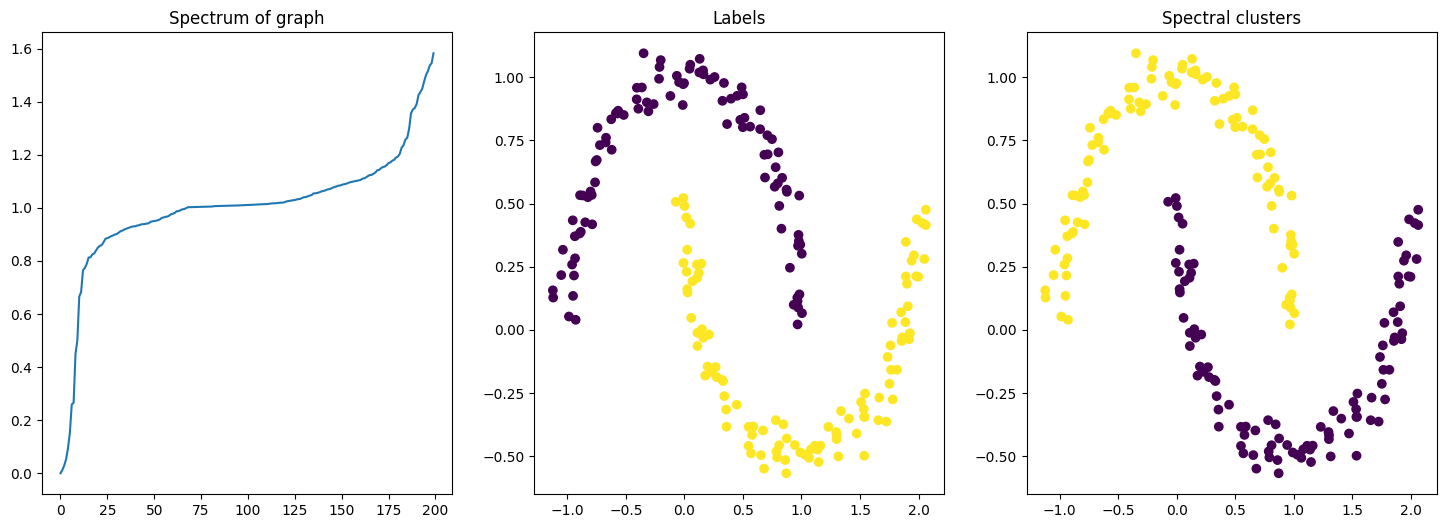

In [18]:
from sklearn.cluster import k_means

# TODO: Do spectral clustering. 

# FH TODO: REMOVE UNTIL NEXT TODO

# L = nx.laplacian_matrix(moons).todense()
L = nx.normalized_laplacian_matrix(moons).todense()

l, e = np.linalg.eig(L)
order = np.argsort(l)
l = l[order]
e = e[:, order]

sel = np.arange(len(l))[np.where(l > 1e-15)][:3]

X_ = e[:, sel]

best_interia = float('inf')
y_clust = None
for i in range(10):
    _, y_, interia, *_ = k_means(X_, 2)
    if interia < best_interia: 
        y_clust = y_
        best_interia = interia

    
# TODO Remove to here.

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].plot(l)
ax[0].set_title("Spectrum of graph")
ax[1].scatter(*(X.T), c=y)
ax[1].set_title("Labels")
ax[2].scatter(*(X.T), c=y_clust)
ax[2].set_title("Spectral clusters")
